In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#pd.options.display.max_colwidth = 100
pd.set_option('display.max_colwidth', -1)

In [6]:
#Read the Json File
quotes = pd.read_json('quotes.json')

In [7]:
quotes.head()

,Author,Category,Popularity,Quote,Tags
0,Dr. Seuss,life,0.155666,"Don't cry because it's over, smile because it happened.","[attributed-no-source, cry, crying, experience, happiness, joy, life, misattributed-dr-seuss, optimism, sadness, smile, smiling ]"
1,Dr. Seuss,happiness,0.155666,"Don't cry because it's over, smile because it happened.","[attributed-no-source, cry, crying, experience, happiness, joy, life, misattributed-dr-seuss, optimism, sadness, smile, smiling ]"
2,Marilyn Monroe,love,0.129122,"I'm selfish, impatient and a little insecure. I make mistakes, I am out of control and at times hard to handle. But if you can't handle me at my worst, then you sure as hell don't deserve me at my best.","[attributed-no-source, best, life, love, mistakes, out-of-control, truth, worst ]"
3,Marilyn Monroe,life,0.129122,"I'm selfish, impatient and a little insecure. I make mistakes, I am out of control and at times hard to handle. But if you can't handle me at my worst, then you sure as hell don't deserve me at my best.","[attributed-no-source, best, life, love, mistakes, out-of-control, truth, worst ]"
4,Marilyn Monroe,truth,0.129122,"I'm selfish, impatient and a little insecure. I make mistakes, I am out of control and at times hard to handle. But if you can't handle me at my worst, then you sure as hell don't deserve me at my best.","[attributed-no-source, best, life, love, mistakes, out-of-control, truth, worst ]"


In [9]:
#Check if there is NaN Values in Columns
quotes.isnull().sum()

#If found null values and NAN Values
#dataframe.drop(columns_to_drop, inplace=True, axis=1)
#If fonund rows with NAN
#dataframe = dataframe.dropna()

Author        0
Category      0
Popularity    0
Quote         0
Tags          0
dtype: int64

In [5]:
#Check if there is NaN Values in Rows
quotes.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
48361    0
48362    0
48363    0
48364    0
48365    0
48366    0
48367    0
48368    0
48369    0
48370    0
48371    0
48372    0
48373    0
48374    0
48375    0
48376    0
48377    0
48378    0
48379    0
48380    0
48381    0
48382    0
48383    0
48384    0
48385    0
48386    0
48387    0
48388    0
48389    0
48390    0
Length: 48391, dtype: int64

In [6]:
#Data is Cleaned as we see in the row and columns of the data

In [12]:
#Convert the Popularity Column into Some More Precise Values or Change it from 0.1 to 1.0
quotes['Popularity'] = quotes['Popularity']*100

In [13]:
#Check How Many Categories We Have
categories = quotes['Category']
cat = categories.unique()
cat

array(['life', 'happiness', 'love', 'truth', 'inspiration', 'humor',
       'philosophy', 'science', '', 'soul', 'books', 'wisdom',
       'knowledge', 'education', 'poetry', 'hope', 'friendship',
       'writing', 'religion', 'death', 'romance', 'success', 'arts',
       'relationship', 'motivation', 'faith', 'mind', 'god', 'funny',
       'quotes', 'positive', 'purpose'], dtype=object)

<BarContainer object of 50 artists>

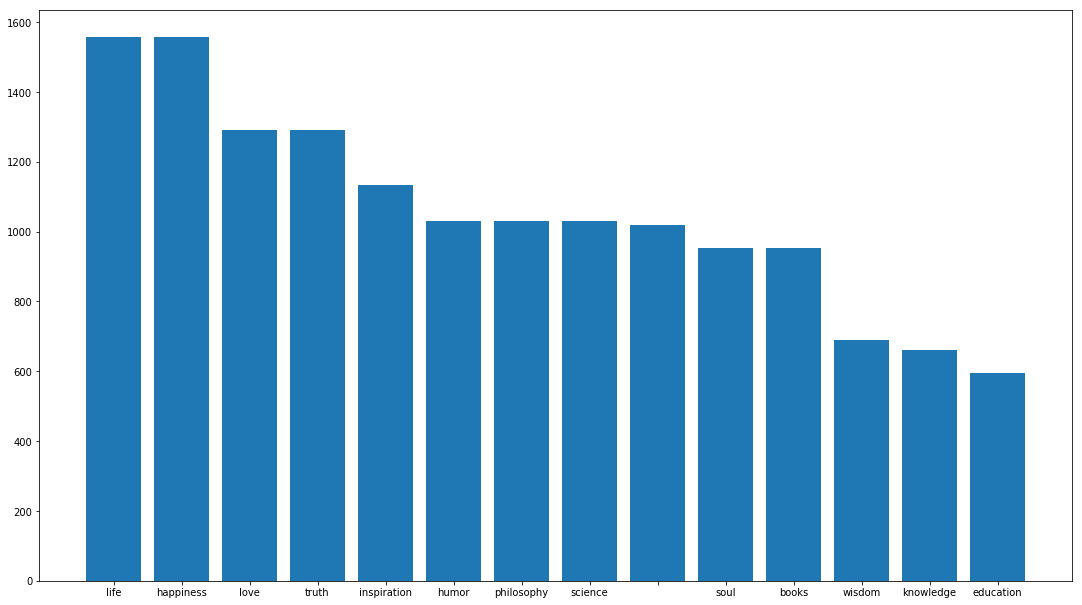

In [14]:
#Plot a Test Graph Between Popularity and Category
X = quotes.Popularity.values
Y = quotes.Category.values
X = X[:50]
Y = Y[:50]
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
plt.bar(Y,X)

In [15]:
#Now We Calculate the Popularity of Author that is most in all
group = quotes.groupby('Author')['Popularity'].mean()

In [16]:
ans = group.sort_values(ascending=False).head()#Top Author is William W. Purkey
ans

Author
William W. Purkey                                   1000.561001
Oscar Wilde,  The Happy Prince and Other Stories    582.690583 
Narcotics Anonymous                                 540.460540 
H. Jackson Brown Jr.,  P.S. I Love You              512.830513 
AndrÃ© Gide,  Autumn Leaves                         476.250476 
Name: Popularity, dtype: float64

<BarContainer object of 5 artists>

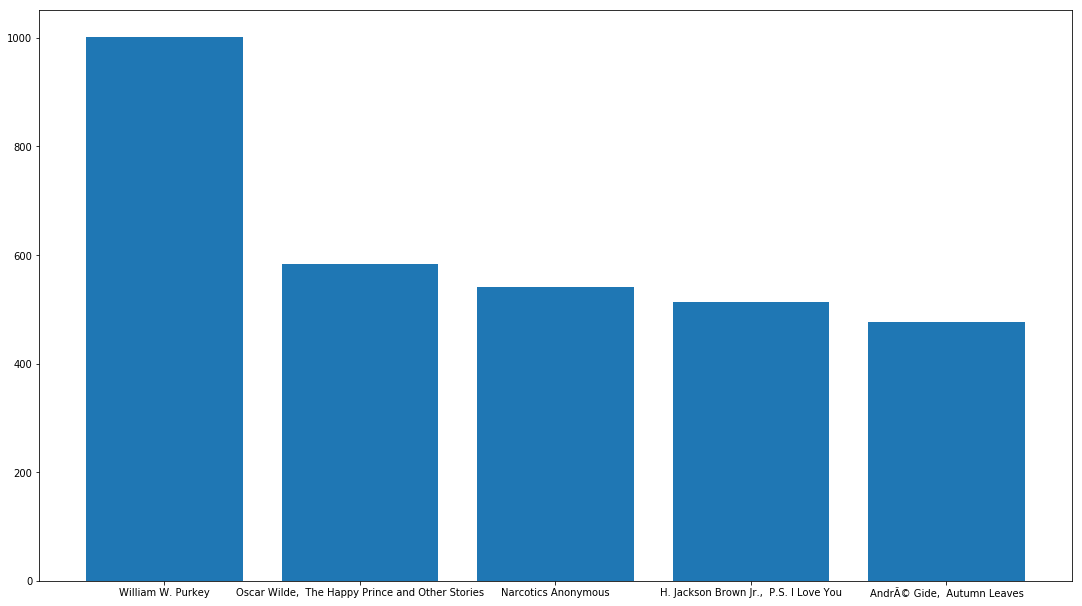

In [17]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
plt.bar(ans.index,ans.values)

In [18]:
#Check the Quotes According to Any Category
pd.DataFrame(quotes.loc[quotes['Category']=='inspiration']['Quote']).head()

,Quote
5,Be yourself; everyone else is already taken.
12,"You've gotta dance like there's nobody watching,Love like you'll never be hurt,Sing like there's nobody listening,And live like it's heaven on earth."
20,Be the change that you wish to see in the world.
26,No one can make you feel inferior without your consent.
33,Live as if you were to die tomorrow. Learn as if you were to live forever.


In [19]:
#Check Mean of All Categories
popular = quotes.groupby('Category')['Popularity'].mean()
popular

Category
                47.044428
arts            55.077303
books           13.138567
death           4.492881 
education       2.435515 
faith           1.949533 
friendship      23.522176
funny           4.321572 
god             2.493041 
happiness       6.720839 
hope            29.015276
humor           22.154312
inspiration     7.682076 
knowledge       1.905952 
life            24.145098
love            25.557584
mind            0.654968 
motivation      15.791192
philosophy      2.773134 
poetry          4.606379 
positive        0.179469 
purpose         0.247918 
quotes          0.231753 
relationship    3.465086 
religion        3.313365 
romance         4.420853 
science         3.790944 
soul            1.829180 
success         27.920823
truth           6.959189 
wisdom          6.180842 
writing         5.139277 
Name: Popularity, dtype: float64

<BarContainer object of 32 artists>

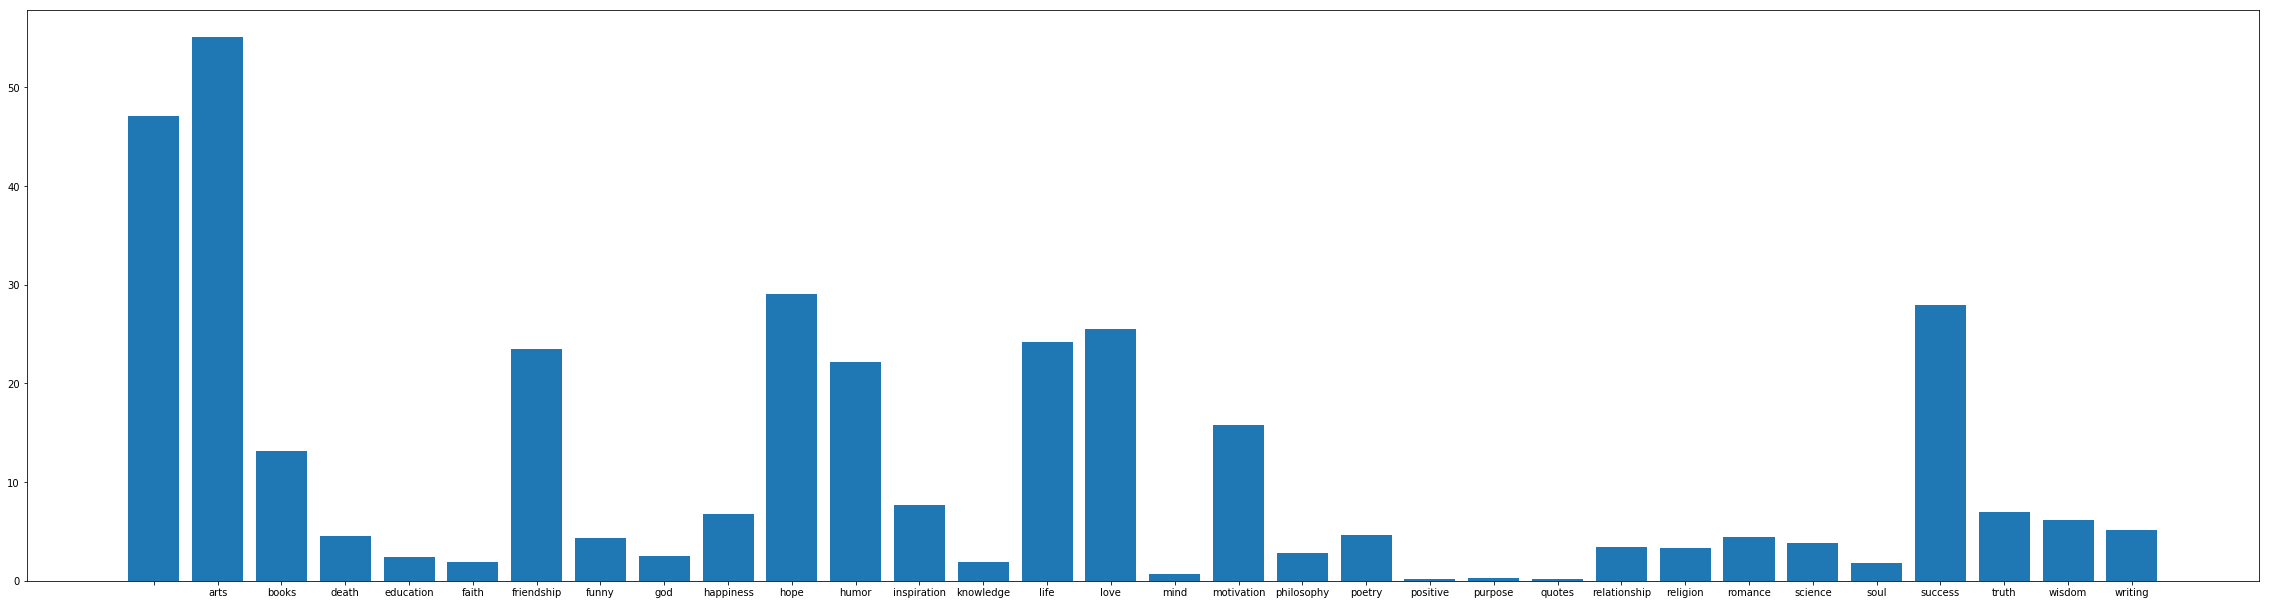

In [20]:
#Plot Graph of all Categories and Their Mean Values
fig = plt.gcf()
fig.set_size_inches(40, 10.5, forward=True)
plt.bar(popular.index,popular.values)

In [21]:
#Top 5 Categories
popular.nlargest(5)

Category
arts       55.077303
           47.044428
hope       29.015276
success    27.920823
love       25.557584
Name: Popularity, dtype: float64

In [18]:
#Split the First 3 Tags in different Columns
quotes['Tags'] = quotes['Tags'].apply(lambda x: str(x).replace('-',' '))
quotes['Tags'].unique()

array(["['attributed no source', 'cry', 'crying', 'experience', 'happiness', 'joy', 'life', 'misattributed dr seuss', 'optimism', 'sadness', 'smile', 'smiling ']",
       "['attributed no source', 'best', 'life', 'love', 'mistakes', 'out of control', 'truth', 'worst ']",
       "['attributed no source', 'be yourself', 'honesty', 'inspirational', 'misattributed oscar wilde ']",
       ..., "['Love', 'British', 'Surreal']", "['Funny', 'Guy']",
       "['Time', 'Beautiful', 'Fool']"], dtype=object)

In [22]:
quotes['Tag_1'] = ''
quotes['Tag_2'] = ''
quotes['Tag_3'] = ''

quotes['Tag_1']= quotes['Tags'].apply(lambda x: str(x).split(',',3)[:1])
quotes['Tag_2']= quotes['Tags'].apply(lambda x: str(x).split(',',3)[1:2])
quotes['Tag_3']= quotes['Tags'].apply(lambda x: str(x).split(',',3)[2:3])

quotes['Tag_1'] = quotes['Tag_1'].str.get(0)
quotes['Tag_2'] = quotes['Tag_2'].str.get(0)
quotes['Tag_3'] = quotes['Tag_3'].str.get(0)

quotes['Tag_1'] = quotes['Tag_1'].apply(lambda x: str(x).replace("'",""))
quotes['Tag_1'] = quotes['Tag_1'].apply(lambda x: str(x).replace("[",""))

quotes['Tag_2'] = quotes['Tag_2'].apply(lambda x: str(x).replace("'",""))
quotes['Tag_3'] = quotes['Tag_3'].apply(lambda x: str(x).replace("'",""))


quotes.head()

,Author,Category,Popularity,Quote,Tags,Tag_1,Tag_2,Tag_3
0,Dr. Seuss,life,1556.661557,"Don't cry because it's over, smile because it happened.","[attributed-no-source, cry, crying, experience, happiness, joy, life, misattributed-dr-seuss, optimism, sadness, smile, smiling ]",attributed-no-source,cry,crying
1,Dr. Seuss,happiness,1556.661557,"Don't cry because it's over, smile because it happened.","[attributed-no-source, cry, crying, experience, happiness, joy, life, misattributed-dr-seuss, optimism, sadness, smile, smiling ]",attributed-no-source,cry,crying
2,Marilyn Monroe,love,1291.221291,"I'm selfish, impatient and a little insecure. I make mistakes, I am out of control and at times hard to handle. But if you can't handle me at my worst, then you sure as hell don't deserve me at my best.","[attributed-no-source, best, life, love, mistakes, out-of-control, truth, worst ]",attributed-no-source,best,life
3,Marilyn Monroe,life,1291.221291,"I'm selfish, impatient and a little insecure. I make mistakes, I am out of control and at times hard to handle. But if you can't handle me at my worst, then you sure as hell don't deserve me at my best.","[attributed-no-source, best, life, love, mistakes, out-of-control, truth, worst ]",attributed-no-source,best,life
4,Marilyn Monroe,truth,1291.221291,"I'm selfish, impatient and a little insecure. I make mistakes, I am out of control and at times hard to handle. But if you can't handle me at my worst, then you sure as hell don't deserve me at my best.","[attributed-no-source, best, life, love, mistakes, out-of-control, truth, worst ]",attributed-no-source,best,life


In [23]:
#Check Tag_1 Popularity
Tag1_popularity = quotes.groupby('Tag_1')['Popularity'].mean()

In [24]:
#Top 5 in Tag_1
Tag1_popularity.nlargest(5)

Tag_1
from-charles-bayard-miliken         721.860722
61419 likes ]                       614.190614
attributed-no-source                419.812920
misattributed-to-abraham-lincoln    402.800403
edison                              340.680341
Name: Popularity, dtype: float64

In [25]:
jh = [1,4,7,9,78,65,3,6,100000]
np.mean(jh)

11130.333333333334

In [26]:
np.median(jh)

7.0